# TASK 2 – City Analysis (Cognifyz Internship)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Dataset.csv")

df['City'] = df['City'].astype(str).str.strip()

In [3]:
city_counts = (
    df.groupby('City')['Restaurant ID']
    .nunique()
    .reset_index(name='Restaurant_Count')
    .sort_values('Restaurant_Count', ascending=False)
)
print(city_counts.head(10))

            City  Restaurant_Count
88     New Delhi              5473
50       Gurgaon              1118
89         Noida              1080
43     Faridabad               251
48     Ghaziabad                25
17  Bhubaneshwar                21
69       Lucknow                21
51      Guwahati                21
2      Ahmedabad                21
5       Amritsar                21


In [4]:
city_avg_rating = (
    df.groupby('City')['Aggregate rating']
    .mean()
    .reset_index(name='Average_Rating')
    .sort_values('Average_Rating', ascending=False)
)
print(city_avg_rating.head(10))

                 City  Average_Rating
56         Inner City        4.900000
107       Quezon City        4.800000
73        Makati City        4.650000
95         Pasig City        4.633333
75   Mandaluyong City        4.625000
15         Beechworth        4.600000
67             London        4.535000
123       Taguig City        4.525000
116      Secunderabad        4.500000
66            Lincoln        4.500000


In [5]:
city_analysis = pd.merge(city_counts, city_avg_rating, on='City')
print(city_analysis.head(10))

           City  Restaurant_Count  Average_Rating
0     New Delhi              5473        2.438845
1       Gurgaon              1118        2.651431
2         Noida              1080        2.036204
3     Faridabad               251        1.866932
4     Ghaziabad                25        2.852000
5  Bhubaneshwar                21        3.980952
6       Lucknow                21        4.195238
7      Guwahati                21        4.190476
8     Ahmedabad                21        4.161905
9      Amritsar                21        3.685714


In [6]:
top_city_by_restaurants = city_counts.iloc[0]
top_city_by_rating = city_avg_rating.iloc[0]

print(f" City with most restaurants: {top_city_by_restaurants['City']} ({top_city_by_restaurants['Restaurant_Count']})")
print(f" City with highest average rating: {top_city_by_rating['City']} ({top_city_by_rating['Average_Rating']:.2f})")

 City with most restaurants: New Delhi (5473)
 City with highest average rating: Inner City (4.90)


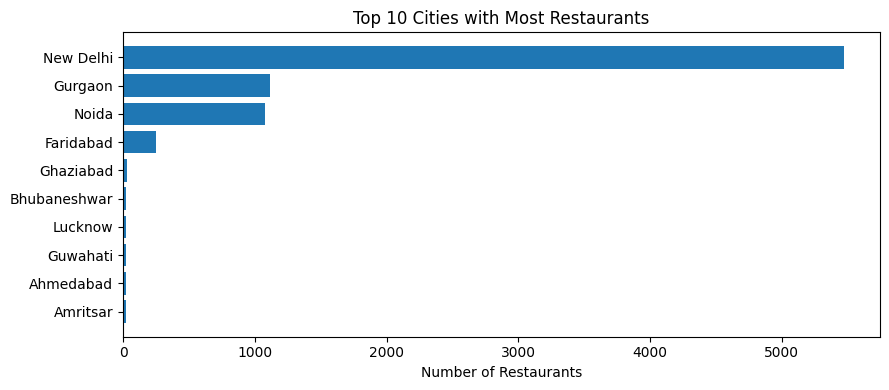

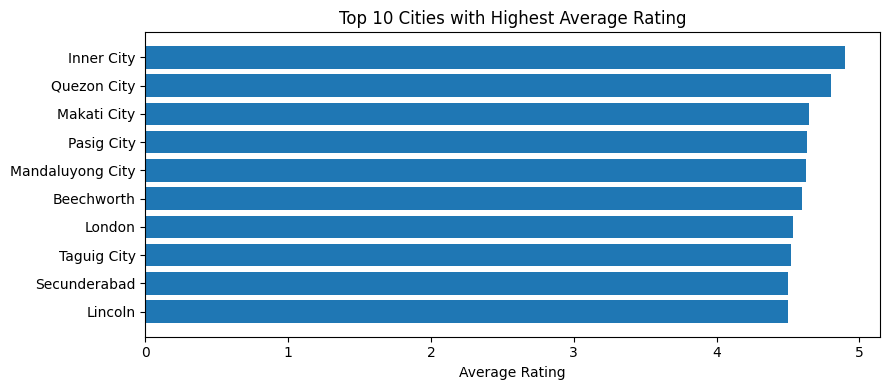

In [7]:
# Top 10 cities by restaurant count
plt.figure(figsize=(9,4))
plt.barh(city_counts.head(10)['City'], city_counts.head(10)['Restaurant_Count'])
plt.gca().invert_yaxis()
plt.xlabel("Number of Restaurants")
plt.title("Top 10 Cities with Most Restaurants")
plt.tight_layout()
plt.show()

# Top 10 cities by average rating
plt.figure(figsize=(9,4))
plt.barh(city_avg_rating.head(10)['City'], city_avg_rating.head(10)['Average_Rating'])
plt.gca().invert_yaxis()
plt.xlabel("Average Rating")
plt.title("Top 10 Cities with Highest Average Rating")
plt.tight_layout()
plt.show()